In [1]:
import pandas as pd 
import numpy as np 
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
class simpsons_paradox:
    
    def __init__(self, df, x, y):

        self.df = df
        self.x = x
        self.y = y
        
        
    def sgn(self,beta,pvalue = 0.0):
        """
        This function is to check the signs of beta coefficients, correlations and pvalues. 
        If method is 1, checks signs of betas.

        Params
        beta: coefficients from linear model 
        pvalue: pvalue of coefficients from linear model
        """

        if (beta == 0.0) | (pvalue > 0.05): 
            return(0)
        elif beta > 0.0: 
            return(1)
        else:
            return(-1)

    def trend_analysis(self,X,Y,data,Ytype = 'continuous'):
        """
        This functionn is to estimate te coefficients that we will later use to check correlations.

        Params
        X: covariate name string, should be one covariate at a time. 
        Y: outcome variable name sttring.
        Ytype: should be either 'discrete' or 'continuous.'
        dataframe: pandas dataframe of data
        """
        if Ytype == 'continuous': 
            X2 = sm.add_constant(data[[X]])
            est = sm.OLS(data[[Y]], X2) 
            est2 = est.fit()
            return(np.round(est2.params[1],3), np.round(est2.pvalues[1],3))
        else: 
            X2 = sm.add_constant(data[[X]])
            est = sm.Logit(data[[Y]], X2)
            est2 = est.fit()
            return(np.round(est2.params[1],3), np.round(est2.pvalues[1],3))
        

    def sgn_corr(self,correlations):
        """
        This functions determines if the correlation is negative or positive. 

        Params: 
        correlations: precalculated correlations between variables and outcomes.
        """
        if np.round(correlations,3) >= 0: 
            return(1)
        else: 
            return(-1)
        
        
    def eval_simpsons_paradox(self, split_var): 
        """
        """
        paradox_pairs1 = []
        paradox_pairs2 = []
        for paradox_var in self.x: 
            beta1,pval1 = self.trend_analysis(paradox_var,self.y,self.df)
            agg = self.sgn(beta = beta1, pvalue = pval1)
            for condition_var in split_var: 
                if paradox_var != condition_var: 
                    dagg = []
                    for con_gr in self.df[condition_var].unique():
                        X_pc = self.df[self.df[condition_var] == con_gr]
                        beta2,pval2 = self.trend_analysis(paradox_var, self.y,X_pc)
                        dagg.append(self.sgn(beta = beta2, pvalue = pval2))
                    if agg != self.sgn(np.mean(dagg)): 
                        paradox_pairs1.append(paradox_var)
                        paradox_pairs2.append(condition_var)
        if not paradox_pairs1: 
            print("No Simpson's Paradox")
        else: 
            return paradox_pairs1, paradox_pairs2        
        
        
    
    def data_sample(n_subgroups=3, n_samples=1000):

        overall_cov = 3*np.array([[1,0.9], [0.9,1]])

        means = np.random.multivariate_normal(mean=[0,0], cov=overall_cov, size=n_subgroups)

        weights = np.random.uniform(size=n_subgroups)
        weights /= np.sum(weights)
        covs = [np.random.uniform(0.2,0.8) for _ in range(n_subgroups)]
        covs = [np.array([[1,-c], [-c,1]]) for c in covs]


        samples = []

        for sg, (mean, cov, w) in enumerate(zip(means, covs, weights)):
            n = int(round(n_samples * w))
            sample = np.random.multivariate_normal(mean=mean, cov=cov, size=n)
            sample = pd.DataFrame(sample, columns=["x", "y"])
            sample["z"] = sg
            samples.append(sample)

        df = pd.concat(samples)

        return df
    
    def plot_general_trend(self):
        
        sns.regplot(data=self.df, x=self.x, y=self.y)
        
    def plot_simpsons_paradox(self, split_var):
        
        fig, ax = plt.subplots()

        for z in self.df[split_var].unique():
            sns.regplot(data=self.df[self.df[split_var]==z], x=self.x, y=self.y, ax=ax)
        
    

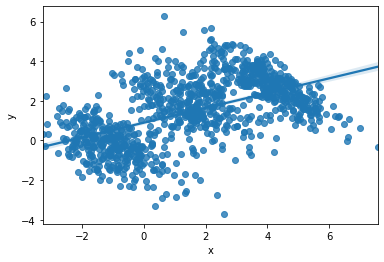

In [9]:
df = simpsons_paradox.data_sample()

x = simpsons_paradox(df, 'x', 'y')

x.plot_general_trend()

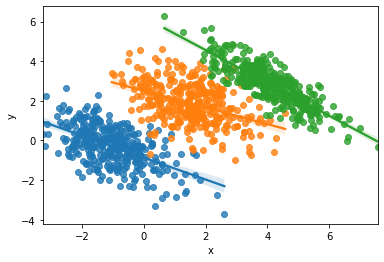

In [10]:
x.plot_simpsons_paradox('z')

In [11]:
x.eval_simpsons_paradox('z')

(['x'], ['z'])